# Beaver Tutorial 2: Advanced Features (Data Scientist)

**Features:** Output capture, live variables, reliable wait methods

Run this alongside `02-advanced-features-do.ipynb` in a separate tab.

## Step 1: Setup

In [1]:
!uv pip install pandas matplotlib numpy -q

In [2]:
import beaver
from beaver import Twin
import time

bv = beaver.ctx()
session = bv.active_session()
session.reset(force=True)

print(f"You: {bv.user}")
print(f"Peer: {session.peer}")

Matplotlib is building the font cache; this may take a moment.


🔄 Auto-load replies enabled for client2@sandbox.local (polling every 0.5s)
🟢 Active session loaded: 64d44e56df7f
   Peer: client1@sandbox.local
  Deleted: data/ (0 files)
✓ Session reset: 0 files deleted
You: client2@sandbox.local
Peer: client1@sandbox.local


## Step 2: Wait for Data

**Run DO notebook Steps 1-3 first!**

In [3]:
stocks = session.wait_for_remote_var("stocks", timeout=120, trust_loader=True)
stocks

⏳ Waiting for 'stocks' from client1@sandbox.local...
📬 'stocks' is now available!
⏳ Waiting for artifact file to sync: stocks_public.bin (8,356 bytes)
⠹ syncing stocks_public.bin (8,356 bytes)
✓ Artifact file synced: stocks_public.bin (8,356 bytes)
✓ Loaded Twin 'stocks' from published location


🌍 Twin: stocks (MOCK DATA - SAFE)
  🔒 Private    (not available) 💡 .request_private()
  🌍 Public                      AAPL       GOOGL        MSFT
2024-01-01...    ← .value uses this
  Owner: client1@sandbox.local
  Live: ⚫ Disabled
  IDs: twin=86281dad... private=abb5d2d0... public=703b170f...

## Step 3: Define Analysis Function

In [4]:
@bv
def analyze_stocks(data):
    """Analyze stock data with stdout capture."""
    print(f"Analyzing {len(data)} days of stock data...")
    print(f"Columns: {list(data.columns)}")
    
    returns = (data.iloc[-1] - data.iloc[0]) / data.iloc[0] * 100
    
    print("\nReturns:")
    for col in data.columns:
        print(f"  {col}: {returns[col]:.2f}%")
    
    return {
        "mean": data.mean().to_dict(),
        "std": data.std().to_dict(),
        "returns": returns.to_dict(),
    }

## Step 4: Run Analysis and Request Private

In [5]:
result = analyze_stocks(stocks)
print("Mock result:", result.public)
result.show_output("public")

Mock result: {'mean': {'AAPL': 149.43254053315178, 'GOOGL': 133.8453373365875, 'MSFT': 380.31000159139916}, 'std': {'AAPL': 6.608426074041916, 'GOOGL': 4.555747397577688, 'MSFT': 3.844975241790074}, 'returns': {'AAPL': -8.134289150778095, 'GOOGL': -4.370665831104405, 'MSFT': 0.6860564350308485}}
📤 Public output:
  stdout: Analyzing 30 days of stock data...
Columns: ['AAPL', 'GOOGL', 'MSFT']

Returns:
  AAPL: -8.13%
  GOOGL: -4.37%
  MSFT: 0.69%



In [6]:
result.request_private()
print("Request sent! Run DO notebook Steps 4-5...")

📨 Sending computation request to client1@sandbox.local
   Function: analyze_stocks
   Result: result
✓ Sent to /Users/madhavajay/dev/biovault-desktop/workspace3/biovault/sandbox/client2@sandbox.local/datasites/client2@sandbox.local/shared/biovault/sessions/64d44e56df7f/1f22f86ed4e8468796bb8615dbdb91ff.beaver
💡 Result will auto-update when client1@sandbox.local approves
Request sent! Run DO notebook Steps 4-5...


## Step 5: Wait for Approved Result

In [ ]:
approved = bv.wait_for_response(result, timeout=300)
print("Real result:", approved.private)
approved.show_output("private")

# Verify private result and output were received
assert approved.private is not None, "Private result should be received"
assert approved.private_stdout is not None, "Private stdout should be captured"
print(f"✓ Private result received with stdout output")

## Step 6: Watch Live Progress

**Run DO notebook Step 6 now!**

In [8]:
progress = session.wait_for_remote_var("progress", timeout=60, trust_loader=True)

# Watch for updates
for i in range(30):
    progress = session.peer_remote_vars["progress"].load(inject=False, auto_accept=True, trust_loader=True)
    p = progress.public
    print(f"Step {p.get('step', '?')}/{p.get('total', '?')}: {p.get('status', '')}")
    if p.get('status') == 'Done!':
        break
    time.sleep(1)

⏳ Waiting for 'progress' from client1@sandbox.local...
📬 'progress' is now available!
🟢 Live sync enabled (read-only, every 1.0s)
✓ Loaded Twin 'progress' from published location
🟢 Live sync enabled (read-only, every 1.0s)
Step 1/4: Loading...
🟢 Live sync enabled (read-only, every 1.0s)
Step 1/4: Loading...
🟢 Live sync enabled (read-only, every 1.0s)
Step 1/4: Loading...
🟢 Live sync enabled (read-only, every 1.0s)
Step 1/4: Loading...
🟢 Live sync enabled (read-only, every 1.0s)
Step 1/4: Loading...
🟢 Live sync enabled (read-only, every 1.0s)
Step 3/4: Analyzing...
🟢 Live sync enabled (read-only, every 1.0s)
Step 3/4: Analyzing...
🟢 Live sync enabled (read-only, every 1.0s)
Step 3/4: Analyzing...
🟢 Live sync enabled (read-only, every 1.0s)
Step 3/4: Analyzing...
🟢 Live sync enabled (read-only, every 1.0s)
Step 3/4: Analyzing...
🟢 Live sync enabled (read-only, every 1.0s)
Step 4/4: Done!


## Step 7: Plot Function with Figure Capture

In [9]:
@bv
def plot_stocks(data):
    """Create stock price visualization."""
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 6))
    for col in data.columns:
        ax.plot(data.index, data[col], label=col, linewidth=2)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.set_title('Stock Prices Over Time')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return {"plotted": list(data.columns)}

📊 Public figures (1):


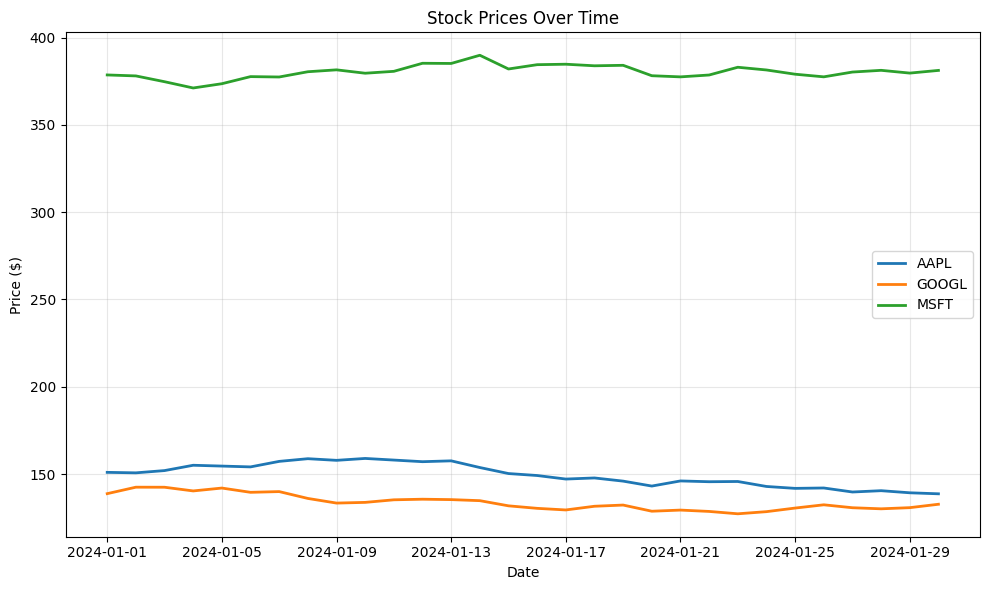

📨 Sending computation request to client1@sandbox.local
   Function: plot_stocks
   Result: plot_result
✓ Sent to /Users/madhavajay/dev/biovault-desktop/workspace3/biovault/sandbox/client2@sandbox.local/datasites/client2@sandbox.local/shared/biovault/sessions/64d44e56df7f/2b1c8f0f86b34a0ba2e1cbad695b66d5.beaver
💡 Result will auto-update when client1@sandbox.local approves
Plot request sent! Run DO notebook Step 7...


In [10]:
plot_result = plot_stocks(stocks)
plot_result.show_figures("public")
plot_result.request_private()
print("Plot request sent! Run DO notebook Step 7...")

## Step 8: Receive Plot Result

In [ ]:
plot_approved = bv.wait_for_response(plot_result, timeout=300)
plot_approved.show_figures("private")

# Verify private figures were received
assert plot_approved.private_figures is not None, "Private figures should be received"
assert len(plot_approved.private_figures) > 0, "Should have at least one private figure"
print(f"✓ Received {len(plot_approved.private_figures)} private figure(s)")

In [ ]:
# Compare mock vs real
print("=== Mock vs Real Comparison ===")
plot_approved.show_figures("public")

# Verify both public and private figures exist
assert plot_approved.public_figures is not None, "Public figures should exist"
assert plot_approved.private_figures is not None, "Private figures should exist"
print(f"✓ Public: {len(plot_approved.public_figures)} figure(s), Private: {len(plot_approved.private_figures)} figure(s)")

## Summary

- `wait_for_remote_var(name)` - Wait for peer to publish data
- `wait_for_response(result)` - Wait for approved result
- `.show_output()` / `.show_figures()` - View captured output
- Live variables for real-time progress monitoring